In [1]:
#import libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
#load data
df = pd.read_csv("Bitcoin_tweets.csv")
df.head()

C:\Users\shiva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [3]:
# remove nan value row in hastags column
df. dropna(subset = ["hashtags"], inplace=True)
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False


In [4]:
df= df[['text']]
df

,text
0,Blue Ridge Bank shares halted by NYSE after #b...
1,"😎 Today, that's this #Thursday, we will do a ""..."
3,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...
...,...
1209344,@ebzzofficial Very interesting project\n@MdRak...
1209345,What a beauty. All 3 uptargets got hit perfect...
1209346,@DaCryptoGeneral Checking out #AIDI ain’t goin...
1209347,"@ebzzofficial good project and strong team, in..."


In [5]:
df.columns= ['tweets']
# create a function to clean the tweets
def cleanTwt(twt):
    twt = re.sub("#bitcoin", 'bitcoin', twt) # removes the '#' from bitcoin
    twt = re.sub("#Bitcoin", 'Bitcoin', twt) # removes the '#' from Bitcoin
    twt = re.sub('#[A-Za-z0-9]+', '', twt) # removes any string with a '#'
    twt = re.sub('\\n', '', twt) # removes the '\n' string
    twt = re.sub('https:\/\/\S+', '', twt) # removes any hyperlinks
    return twt

In [6]:
df['cleaned_tweets'] = df['tweets'].apply(cleanTwt)
df.head()

,tweets,cleaned_tweets
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...
1,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""..."
3,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...


In [ ]:
# create a function to get subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

# create two new columns called "Subjectivity" & "Polarity"
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)

In [ ]:
df.head(5)

In [ ]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [13]:
# create a column to store the text sentiment
df['sentiment'] = df['polarity'].apply(getSentiment)

# show the data
df.head()


,tweets,cleaned_tweets,subjectivity,polarity,sentiment
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.1,0.0,neutral
1,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""...",0.0,0.0,neutral
3,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...,0.1,0.0,neutral
4,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.1,0.0,neutral
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.5,0.4,positive


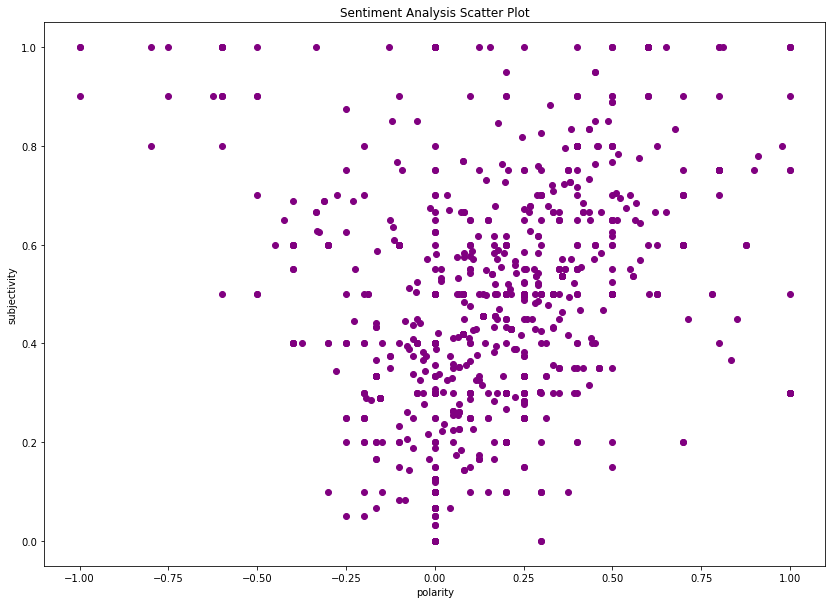

In [11]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

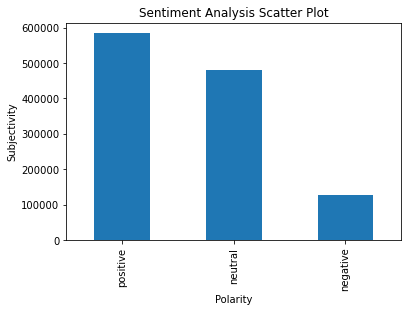

In [14]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()